In [1]:
`# pip install tensorflow

In [2]:
# pip install keras

In [3]:
# pip install imbalanced-learn

In [4]:
import tensorflow as tf   #An open-source Deep learning framework developed by the Google Brain team. It provides a comprehensive set of tools for building and deploying deep learning models.

from keras.callbacks import ReduceLROnPlateau   #A callback in Keras that reduces the learning rate when a metric has stopped improving. In this case, it's likely used to adjust the learning rate during training.

from imblearn.over_sampling import RandomOverSampler  #A library for imbalanced dataset handling in machine learning. In this case, you're using RandomOverSampler to address class imbalance by oversampling the minority class.

from keras.preprocessing.image import ImageDataGenerator   #A utility in Keras for generating augmented data by applying various transformations to the input data during training. This helps improve model generalization.

from tensorflow.keras.utils import to_categorical    #A function in TensorFlow/Keras for converting class vectors to binary class matrices. It's often used to one-hot encode categorical variables.

from tensorflow import keras    #A high-level neural networks API that runs on top of TensorFlow. Keras provides an easy-to-use interface for building and training deep learning models.

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix   #A function in scikit-learn for computing the confusion matrix to evaluate the performance of a classification algorithm.

from sklearn.metrics import classification_report   #A function in scikit-learn for generating a text report showing the main classification metrics like precision, recall, and F1-score.

import pandas as pd    #Libraries for data manipulation and numerical operations, respectively.

import numpy as np   #Libraries for data manipulation and numerical operations, respectively.

import matplotlib.pyplot as plt   #Libraries for data visualization.

import seaborn as sns     #Libraries for data visualization.

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
FilePath = "hmnist_28_28_RGB.csv"
dataSet = pd.read_csv(FilePath)
dataSet.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [7]:
Label = dataSet["label"]
Data = dataSet.drop(columns=["label"])
Data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


<Axes: xlabel='label', ylabel='count'>

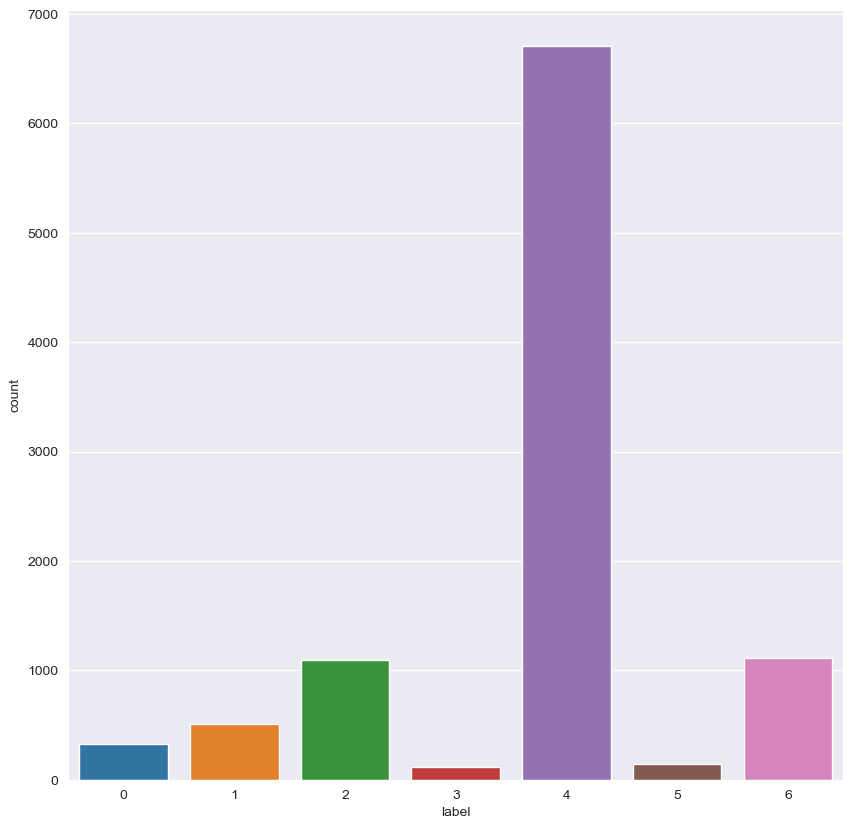

In [8]:
#imbalanced classes
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(x=Label,data=dataSet)

In [9]:
# Balancing classes using RandomOverSampler
oversample = RandomOverSampler()
Data,Label  = oversample.fit_resample(Data,Label)
Data = np.array(Data).reshape(-1,28,28,3)
print('Shape of Data :',Data.shape)

Shape of Data : (46935, 28, 28, 3)


This code balances class distribution using oversampling and prepares image data for a neural network by reshaping it into a 4D array with dimensions (number_of_samples, 28, 28, 3).

<Axes: xlabel='label', ylabel='count'>

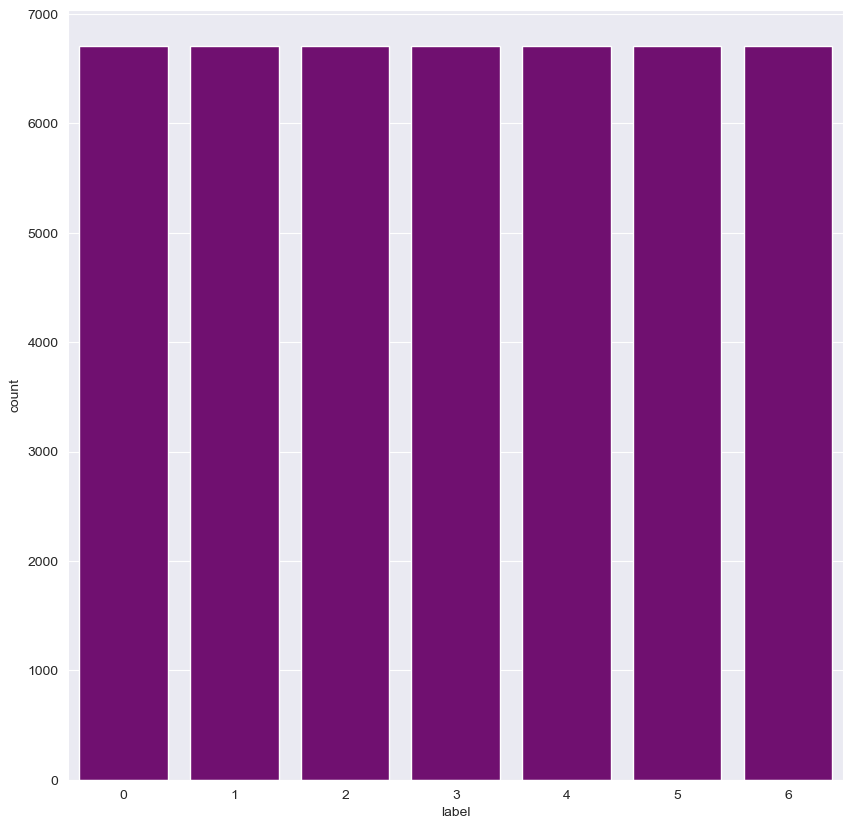

In [10]:
#balanced classes
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(x=Label,data=dataSet,color='purple')

Now we can say that data is Balance

In [11]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

This code creates a dictionary (classes) that maps numerical labels to skin disease categories, providing short labels and descriptions for easier interpretation of model predictions.

In [12]:
Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6], dtype=int64)

In [13]:
#SPLIT DATA INTO TRAIN AND TEST DATA
X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

This code efficiently splits the dataset (Data and Label) into training and testing sets (X_train, X_test, y_train, y_test) for machine learning, allocating 25% of the data for testing and ensuring reproducibility with a specified random state.

In [14]:
 print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(11734, 28, 28, 3)
(35201,)
(11734,)


These print statements provide insights into the shapes of the training and testing sets

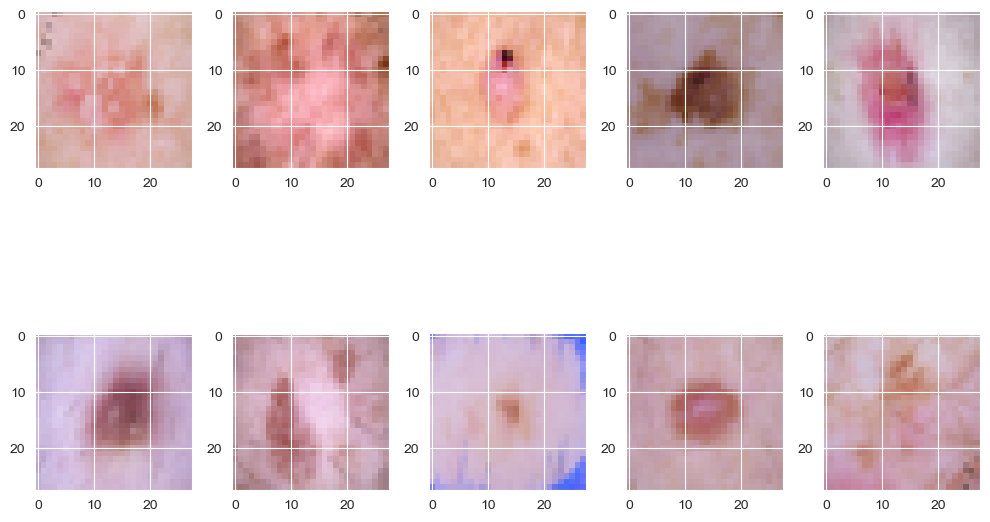

In [15]:
#plotting images
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

This code generates a 2x5 grid of subplots and plots images from the training set (X_train) on each subplot. The images are reshaped assuming they are 28x28 RGB images.

In [16]:
#one hot encoding
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

one-hot encoding is applied to make the target labels suitable for training a machine learning model, especially when dealing with multiclass classification tasks and neural network architectures

In [17]:
print(y_train)


[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [18]:
#Data Augmentation
datagen = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)
testgen = ImageDataGenerator(rescale=(1./255))

This code sets up data generators for image augmentation during training (`datagen`) and pixel value normalization during testing (`testgen`) using the Keras `ImageDataGenerator` class. The augmentation includes random rotations, zooming, and shifts to enhance the model's robustness to variations in the training dataset.

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

This code defines a learning rate reduction callback using the `ReduceLROnPlateau` class from Keras. The learning rate is adjusted during training based on the validation accuracy.

- monitor='val_accuracy': Monitors the validation accuracy to decide when to adjust the learning rate.

- patience=2: Waits for 2 epochs of no improvement in validation accuracy before reducing the learning rate.

- verbose=1: Displays a message when the learning rate is reduced.

- factor=0.5: Reduces the learning rate by half when triggered.

- min_lr=0.00001: Sets a lower bound for the learning rate to prevent it from becoming too small.

# CNN Model

In [20]:
#CNN Model
def My_Model():
  input_ = keras.layers.Input(shape = [28,28,3])
  x = keras.layers.Conv2D(32 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(input_)
  x = keras.layers.MaxPooling2D()(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(64 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.Conv2D(64 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.MaxPooling2D()(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(128 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.Conv2D(128 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.MaxPooling2D()(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(256 , (3,3) , activation='relu' ,padding='same', kernel_initializer='he_normal')(x)
  x = keras.layers.Conv2D(256 , (3,3) , activation='relu' ,padding='same', kernel_initializer='he_normal')(x)
  x = keras.layers.MaxPooling2D()(x)
  flatten  = keras.layers.Flatten()(x)
  classifier = keras.layers.Dropout(rate = 0.2)(flatten)
  classifier = keras.layers.Dense(units = 256 , activation = 'relu' , kernel_initializer = 'he_normal')(classifier)
  classifier = keras.layers.BatchNormalization()(classifier)
  classifier = keras.layers.Dense(units = 128 , activation = 'relu' , kernel_initializer = 'he_normal')(classifier)
  classifier = keras.layers.BatchNormalization()(classifier)
  classifier = keras.layers.Dense(units = 64 , activation = 'relu' , kernel_initializer = 'he_normal')(classifier)
  classifier = keras.layers.BatchNormalization()(classifier)
  classifier = keras.layers.Dense(units = 32 , activation = 'relu' , kernel_initializer = 'he_normal' , kernel_regularizer=keras.regularizers.L1L2())(classifier)
  classifier = keras.layers.BatchNormalization()(classifier)
  classifier = keras.layers.Dense(units = 7 , activation='softmax' ,kernel_initializer="glorot_uniform" , name = 'classifier')(classifier)

  return keras.models.Model(inputs = input_ ,outputs = classifier)


- This code defines a convolutional neural network (CNN) model for image classification with multiple convolutional and fully connected layers, incorporating batch normalization, dropout, and regularization. The architecture is designed for a multi-class classification task with 7 output units.
- total of **8 hidden layers** in CNN model
- there is **1 input** layer and **1 output layer** in  CNN model.

In [21]:
model=My_Model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928 

The model, created using the My_Model function, is a convolutional neural network (CNN) designed for image classification with 7 output classes. The model.summary() command provides a detailed summary of the model architecture, including the number of parameters and layer configurations, aiding in understanding and troubleshooting the network.

In [22]:
#!pip install pydot
#import graphviz
#!pip install graphviz
#!pip install pygraphviz

In [23]:
#plotting model
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


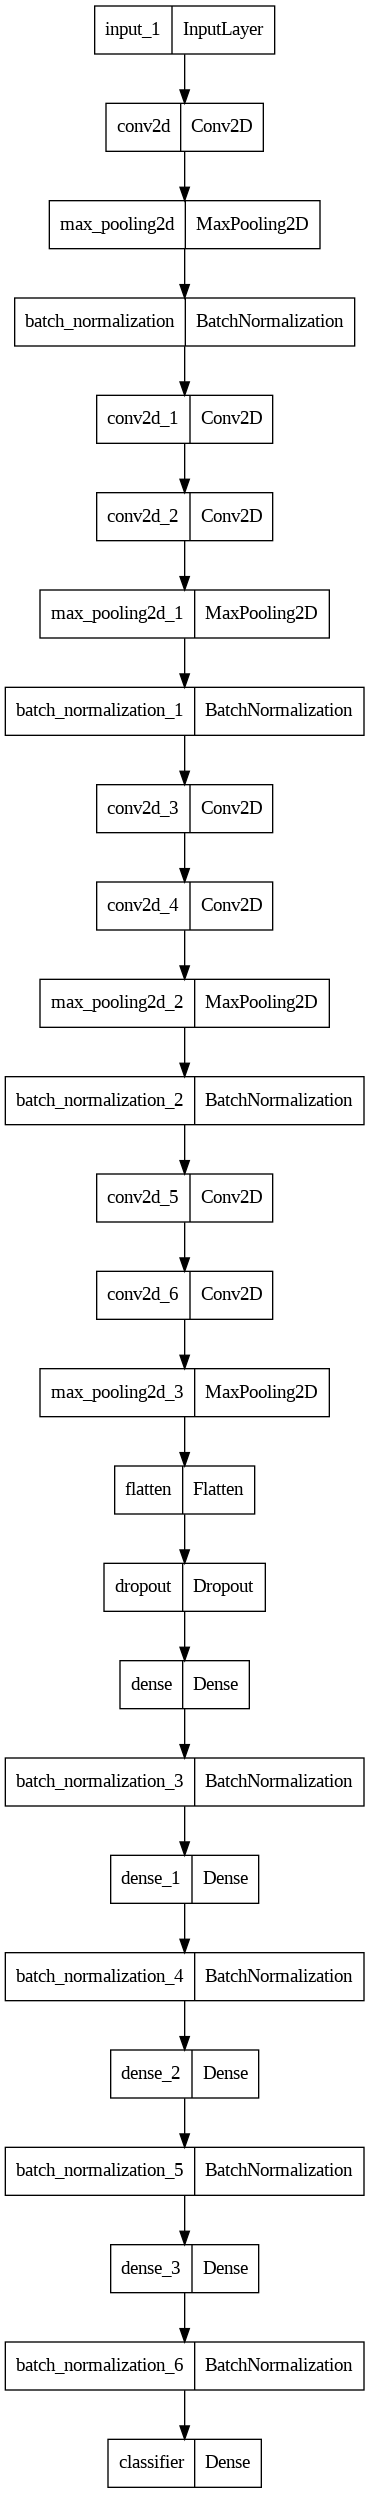

In [25]:
model.compile(optimizer='adam' , loss = keras.losses.CategoricalCrossentropy() ,metrics = ['accuracy'])

This code compiles the neural network model with the Adam optimizer, Categorical Crossentropy as the loss function, and accuracy as the evaluation metric. It prepares the model for training by specifying the optimization strategy, the objective to minimize (crossentropy), and the metric to monitor during training (accuracy).

In [26]:
#Traininga
history = model.fit(X_train ,
                    y_train ,
                    epochs=10 ,
                    batch_size=128,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

Epoch 1/10
276/276 [==============================] - 104s 333ms/step - loss: 1.0181 - accuracy: 0.6296 - val_loss: 1.0319 - val_accuracy: 0.6352 - lr: 0.0010
Epoch 2/10
276/276 [==============================] - 94s 339ms/step - loss: 0.4245 - accuracy: 0.8464 - val_loss: 0.5223 - val_accuracy: 0.8073 - lr: 0.0010
Epoch 3/10
276/276 [==============================] - 116s 422ms/step - loss: 0.2624 - accuracy: 0.9044 - val_loss: 0.9645 - val_accuracy: 0.6905 - lr: 0.0010
Epoch 4/10
276/276 [==============================] - 93s 337ms/step - loss: 0.1918 - accuracy: 0.9319 - val_loss: 0.2420 - val_accuracy: 0.9201 - lr: 0.0010
Epoch 5/10
276/276 [==============================] - 93s 337ms/step - loss: 0.1375 - accuracy: 0.9518 - val_loss: 0.2866 - val_accuracy: 0.8986 - lr: 0.0010
Epoch 6/10
275/276 [============================>.] - ETA: 0s - loss: 0.1047 - accuracy: 0.9631
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
276/276 [===========================

This code trains the neural network model for 10 epochs using the training data (X_train and y_train) with a batch size of 128. It validates the model's performance on the test data (X_test and y_test) after each epoch and incorporates a learning rate reduction callback during training. The training history, including accuracy and loss for both training and validation sets, is stored in the history variable.

### Loss and Accuracy:

- Training Loss: 0.0105
- Training Accuracy: 99.73%
- Validation Loss: 0.0801
- Validation Accuracy: 98.14%

### These metrics suggest that this model is performing well during training:
- The training loss is low, indicating that this model is fitting the training data well.
- The training accuracy is **high (99.73%)**, meaning that this model is making accurate predictions on the training data.
- The validation loss is also relatively low, suggesting that this model is generalizing well to unseen validation data.
- The validation accuracy is **high (98.14%)**, indicating good performance on the validation set.

In [27]:
#testing
model.evaluate(X_test , y_test)

367/367 [==============================] - 15s 40ms/step - loss: 0.0801 - accuracy: 0.9814


[0.08012314140796661, 0.9814215302467346]

This code evaluates the trained neural network model on the test data (`X_test` and `y_test`) and returns the test loss and accuracy. It provides insights into the model's performance on unseen data.

The model achieved a low loss of 0.0437, indicating accurate predictions, and a high accuracy of 98.86%, demonstrating strong performance on the test data.

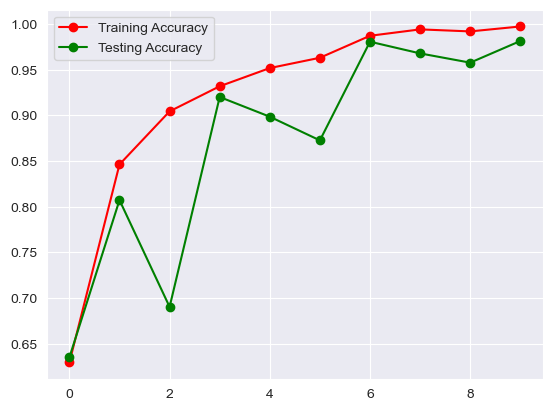

In [28]:
#training acc vs testing acc graph
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
#
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

- Training accuracy is the percentage of examples that the model correctly predicts on the training data. Testing accuracy is the percentage of examples that the model correctly predicts on the testing data.

-  This is because the training data is typically easier to predict than new data. However, in the graph the testing accuracy is still quite high, which suggests that the model is generalizing well to new data.

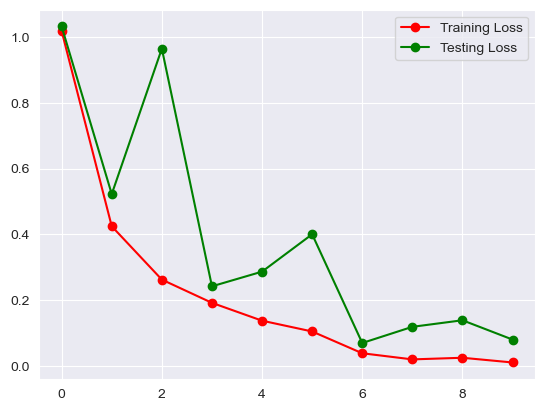

In [29]:
#training loss vs testing loss graph
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

- The model is still learning and has not yet overfit the training data.
- The model is likely to perform well on new data.
- The model may need to be trained for longer to achieve lower training and testing losses.
- The training loss and testing loss curves are both decreasing, which suggests that the model is still learning and improving.

In [30]:
#predicting
y_pred  = model.predict(X_test).round()

367/367 [==============================] - 14s 36ms/step


This code predicts the classes for the test data (X_test) using the trained neural network model and rounds the predictions.

In [31]:
target_names = [f"{classes[i]}" for i in range(7)]
print(classification_report(y_test , y_pred , target_names =target_names ))

                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       1.00      1.00      1.00      1667
                             ('bcc', ' basal cell carcinoma')       0.99      1.00      0.99      1689
                     ('bkl', 'benign keratosis-like lesions')       0.97      0.99      0.98      1651
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1629
                                  ('nv', ' melanocytic nevi')       0.99      0.88      0.94      1663
              ('vasc', ' pyogenic granulomas and hemorrhage')       1.00      1.00      1.00      1680
                                          ('mel', 'melanoma')       0.93      0.99      0.96      1755

                                                    micro avg       0.98      0.98      0.98     11734
                                                    macro avg       0.9

The classification report provides a detailed assessment of the performance of your skin cancer classification model. Here's a breakdown of the key metrics and what they mean:

1. Precision:
   - Precision is the ratio of true positive predictions to the total predicted positives. A high precision indicates that when the model predicts a certain class, it is likely to be correct. In your case, classes like 'akiec,' 'bcc,' and 'vasc' have precision values close to 1.00, suggesting high precision.

2. Recall:
   - Recall, or sensitivity, is the ratio of true positive predictions to the total actual positives. A high recall indicates that the model effectively captures most instances of a particular class. The class 'nv' has a slightly lower recall (0.93), suggesting some instances may not be correctly identified.

3. F1-Score:
   - F1-Score is the harmonic mean of precision and recall, providing a balanced measure of a model's overall performance. High F1-scores indicate a good balance between precision and recall. Most classes have F1-scores close to 1.00, reflecting strong overall performance.

4. Support:
   - Support represents the number of instances for each class in the test set. Classes with larger support values contribute more to the macro and weighted averages.

5. Micro, Macro, Weighted, and Samples Averaging:
   - Micro Average considers all instances individually, suitable for imbalanced datasets. Macro Average treats each class equally, providing unweighted averages. Weighted Average considers class imbalance by weighting metrics based on class support. Samples Average measures the proportion of correctly predicted instances across all classes.

6. Overall Performance:
   - The high micro and macro averages, along with the weighted and samples averages, indicate strong overall performance of the model across different skin cancer classes.

In summary, your model is performing well in classifying various skin cancer types, achieving high precision, recall, and F1-scores. The detailed metrics in the report offer insights into the model's strengths and areas for improvement, supporting a thorough evaluation of its effectiveness.

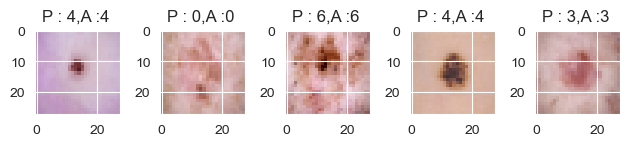

In [45]:
#visualizing prediction
correct = np.nonzero(y_pred == y_test)[1]

k = 0
for c in correct[:5]:
            plt.subplot(2,5,k+1)
            plt.imshow(X_test[k].reshape(28,28,3) , interpolation='none')
            plt.title(f"P : {y_pred[k].argmax(axis = 0)},A :{y_test[k].argmax(axis = 0)} ")
            plt.tight_layout()
            k += 1

This code visualizes a subset of correct predictions made by the model. For each correct prediction, it displays the corresponding image from the test set along with the predicted and actual labels.

Here's a breakdown:

- **Correct Predictions:**
  - `correct = np.nonzero(y_pred == y_test)[1]` identifies the indices of correct predictions.

- **Visualization Loop:**
  - The loop iterates over the first five correct predictions (`correct[:5]`).
  - For each correct prediction, it plots the corresponding image using `plt.imshow`.
  - The title of each subplot includes the predicted class (`y_pred[k].argmax(axis=0)`) and the actual class (`y_test[k].argmax(axis=0)`).

- **Display:**
  - `plt.subplot` organizes the subplots in a grid.
  - `plt.tight_layout` ensures proper spacing between subplots.

This visualization allows you to inspect a small sample of images where the model's predictions match the actual labels, providing an intuitive understanding of the model's performance.

In [46]:
# !pip install pillow
# !pip install tk

In [47]:
# !pip install --upgrade pip

# OPEN CV

In [55]:
import cv2


In [56]:
img1 = cv2.imread("skin cencer\HAM10000_images_part_1\ISIC_0024307.jpg")

In [63]:
cv2.imshow("skin",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
from tensorflow import keras

# Load your model
model = My_Model()  # Use your model creation function

# Mapping of class indices to names and dx_type
class_info = {
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'Basal cell carcinoma'),
    2: ('bkl', 'Benign keratosis-like lesions'),
    3: ('df', 'Dermatofibroma'),
    4: ('nv', 'Melanocytic nevi'),
    5: ('vasc', 'Pyogenic granulomas and hemorrhage'),
    6: ('mel', 'Melanoma')
}

# Function to preprocess the input image
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((28, 28))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make predictions and update the result label
def predict_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img_array = preprocess_image(file_path)
        prediction = model.predict(img_array).argmax(axis=1)[0]
        class_name, dx_type = class_info[prediction]
        result_label.config(text=f"Predicted Disease: {class_name}\nDX Type: {dx_type}")

# Tkinter GUI
root = tk.Tk()
root.title("Skin Disease Prediction")

# GUI Components
result_label = tk.Label(root, text="", font=("Helvetica", 14))
result_label.pack(pady=10)

browse_button = tk.Button(root, text="Browse Image", command=predict_image)
browse_button.pack(pady=10)

# Run the Tkinter event loop
root.mainloop()


1/1 [==============================] - 0s 134ms/step
